Use Simple Protein Expression Model to visualize Phase shift between mRNA and protein expression curves

In [1]:
# Read in Images

# STEP 1
# import libraries
import fitz
import io
from PIL import Image

In [2]:
# open the file
pdf_file = fitz.open("ArntlPer2.pdf")

In [3]:
Images = []
for page_index in range(len(pdf_file)):
    page = pdf_file[page_index]
    pix = page.get_pixmap() 
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    Images.append(img)

In [4]:
# Read in info for mRNA
import csv

with open('ArntlPer2.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    Genes =[]
    for row in reader:
        mrna={'gene':row["Gene"],'A':float(row["Amplitude"]),'peakTime':float(row["peakTime"]),'m0' : float(row["Basal"])}
        Genes.append(mrna)

In [5]:
# Add images to mRNA dictionary
for i in range(len(Genes)):
    Genes[i]['img'] = Images[i]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2,pi,sqrt,log

In [7]:
# 24 h Period
T = 24 #h
ω = 2*np.pi / T # h^(-1)

print("ω = ", ω)

ω =  0.2617993877991494


In [8]:
Genes[0]['gene']

'Arntl'

In [9]:
# Define half-life

Genes[0]['halfLife'] = 3.6
Genes[1]['halfLife'] = 3.4

In [10]:
for i in range(len(Genes)):
    τ_h = Genes[i]['halfLife']
    γ = log(2) / τ_h
    ϕ = atan2(ω,γ)
    
    print(Genes[i]['gene'] + ": phase", ϕ/ω)   

Arntl: phase 3.5778201971252312
Per2: phase 3.4727741903379186


In [11]:
for i in range(len(Genes)):
    τ_h = Genes[i]['halfLife']
    γ = log(2) / τ_h
    A = Genes[i]['A']
    peakTime = Genes[i]['peakTime']
    m0 = Genes[i]['m0']
    
    b = A/m0
    
    B = b*γ / sqrt( γ**2 + ω**2 )
    
    print(Genes[i]['gene'] + ": relative amplitude", B)   

Arntl: relative amplitude 0.6749293543618926
Per2: relative amplitude 0.6004939383836505


In [12]:
from matplotlib import patches as pat
from matplotlib.ticker import AutoMinorLocator

In [13]:
t = np.linspace(0,72, 720+1)

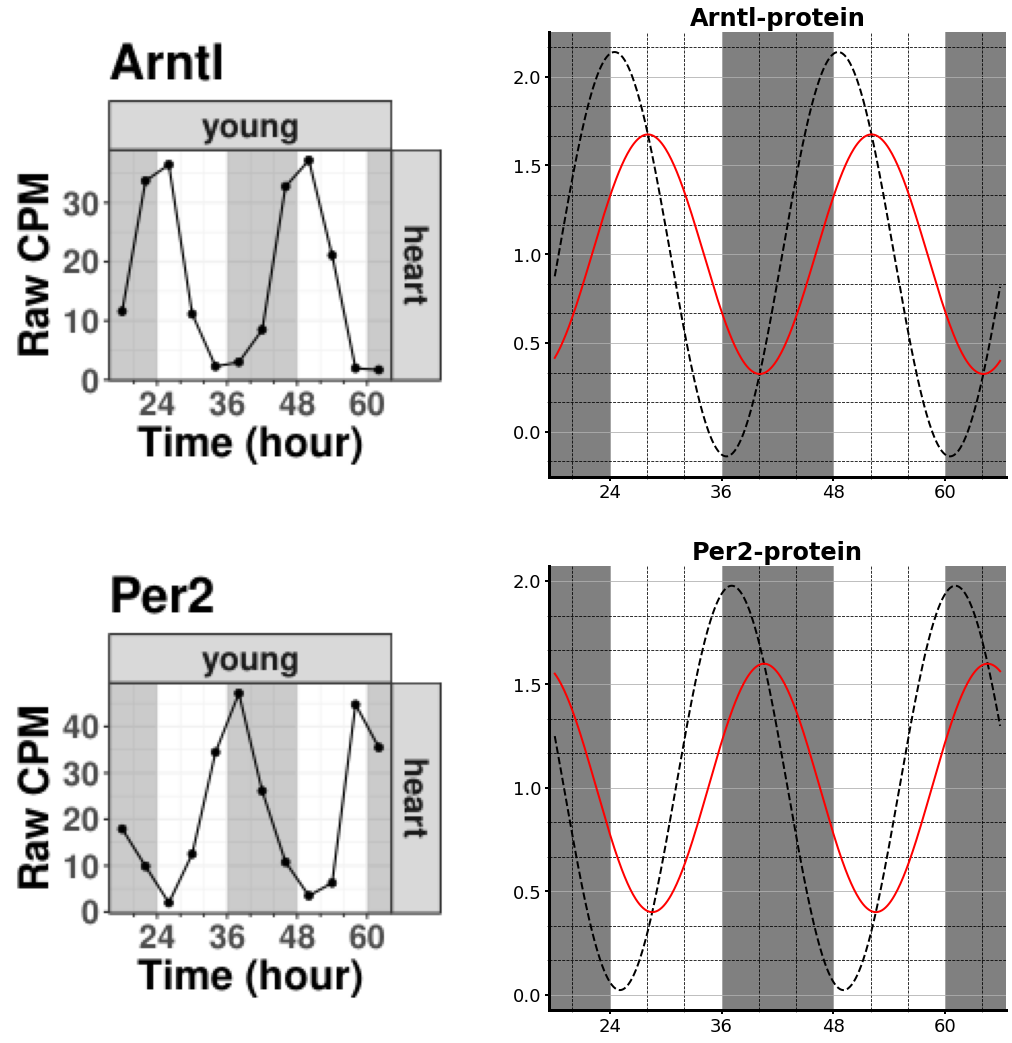

In [14]:
fig,axs = plt.subplots(2,2)
from Style import Style

fig.set_size_inches(18,18)

for i in range(len(Genes)):
    gene = Genes[i]['gene']
    
    img = Genes[i]['img']
    τ_h = Genes[i]['halfLife']
    A = Genes[i]['A']
    peakTime = Genes[i]['peakTime']
    m0 = Genes[i]['m0']
    
    
    ϕ_m = peakTime*ω
    
    b = A/m0
    γ = log(2) / τ_h
    
    ϕ = atan2(ω,γ)
    
    B = b*γ / sqrt( γ**2 + ω**2 )
    
    
    ax = axs[i][0]
    ax.imshow(img)
    ax.axis('off')

    ax = axs[i][1]
    
    ind = (t > 18) & (t < 66)
    m_m0 = (1 + b*np.cos(ω*t - ϕ_m))
    P_p0 = (1 + B*np.cos(ω*t - ϕ_m - ϕ))
    
    
    
    with open(gene + '.csv', 'w') as csvfile:
    
        writer = csv.writer(csvfile)
        for j in range(len(t[ind])):
            writer.writerow([t[ind][j],m_m0[ind][j],P_p0[ind][j]])
    
    
    
    ax.plot(t[ind], m_m0[ind], color='k',ls='--', lw=2 )

    ax.plot(t[ind], P_p0[ind], color='red', lw=2 )

    (yMin1,yMax1) = ax.get_ylim()
    
    rec = pat.Rectangle([12,yMin1], 12.0, yMax1-yMin1, color="grey")
    ax.add_patch(rec)
    rec = pat.Rectangle([36,yMin1], 12.0, yMax1-yMin1, color="grey")
    ax.add_patch(rec)
    rec = pat.Rectangle([60,yMin1], 12.0, yMax1-yMin1, color="grey")
    ax.add_patch(rec)  

    ax.set_xticks(range(0,72+1,12))
    ax.set_yticks([0.0,0.5,1.0,1.5,2.0])
    
    minor_locator = AutoMinorLocator(3)
    ax.xaxis.set_minor_locator(minor_locator)
    minor_locator = AutoMinorLocator(3)
    ax.yaxis.set_minor_locator(minor_locator)
    
    ax.set_xlim([17.5, 66.5])
    
    ax.grid(visible = True)
    ax.grid(visible=True, which='minor', color='k', linestyle='--')
    
    ax.set_title(gene + "-protein")
    Style(ax)
    
plt.savefig("ArntlPer2.tiff")
plt.savefig("ArntlPer2.svg")

plt.show()  